In [1]:
%matplotlib widget

In [2]:
from crank_nicolson_2d import *

In [3]:
import numpy as np

In [4]:
def tunnelCase(position, where, width, potential = 1): 
    return np.where(
            (position.x > where) & (position.x < (where + width)), 
            potential, 
            0, 
        )

In [5]:
def hydrogenAtom(position, potential, bottom = 1): 
    return potential / np.sqrt(
            (position.x / 2) ** 2 \
            + (position.y / 2) ** 2 \
            + bottom ** 2 \
        )

In [6]:
def doubleSlit(position, where, width, slitHeight, gapHeight, potential = 1, math=np): 
    totalY = math.max(position.y)
    return math.where(
            (position.x > where) & (position.x < (where + width)) 
                    & ( \
                            (position.y > ((totalY / 2) + (gapHeight + slitHeight))) \
                            | (position.y < ((totalY / 2) - (gapHeight + slitHeight))) \
                            | ( \
                               (position.y > ((totalY / 2) - gapHeight)) \
                               & (position.y < ((totalY / 2) + gapHeight)) \
                              )
                      ), 
            potential, 
            0, 
        )

In [7]:
pointCount : int = 50
spatialStep : float = .01
temporalStep : float = (spatialStep ** 2) / 4
courantNumber : float = 1.0
assert (temporalStep / spatialStep) <= courantNumber
profile = SimulationProfile(
        makeLinspaceGrid(pointCount, 1, 2, False, float, np), 
        lambda position : makeWavePacket(position, .8, 0.5, .05, 15 * np.pi, np), 
        lambda position, time : doubleSlit(position, .4, .1, .05, .0125, 0), 
        temporalStep, 
        spatialStep, 
        False
    )
simulator = Simulator(profile)
simulator.simulate(300, False)
probabilities, probabilityDecibles = simulator.processProbabilities()

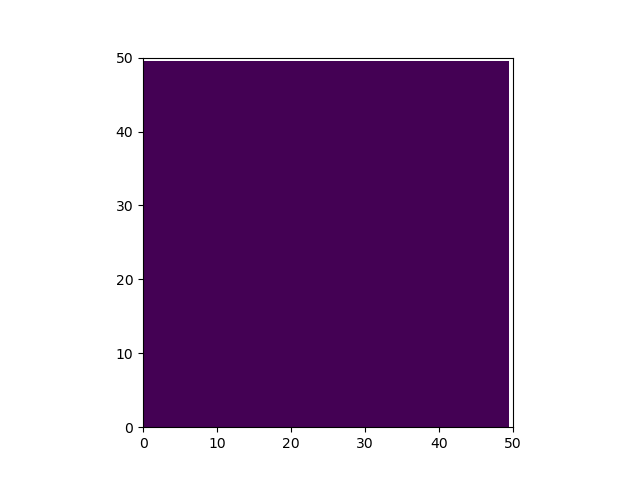

In [8]:
potentialAnimation = animateImages(pointCount, simulator.potentials)

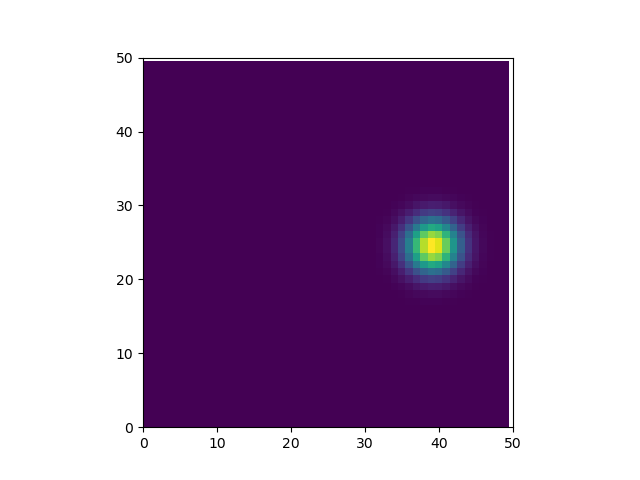

In [9]:
waveAnimation = animateImages(pointCount, simulator.probabilities, interval = 50)

<Figure size 640x480 with 0 Axes>

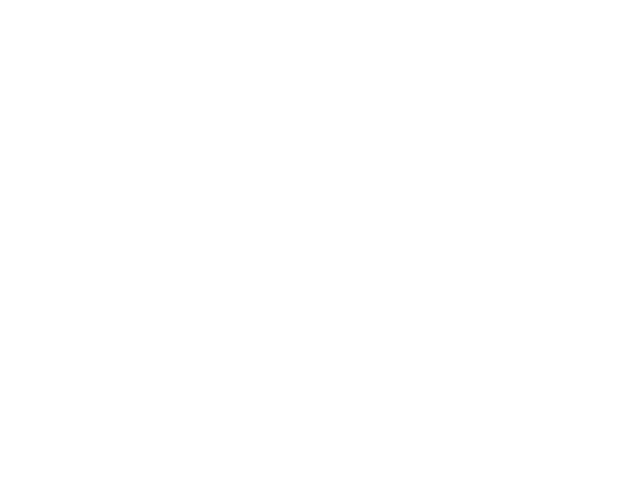

In [10]:
plt.figure()

In [11]:
plt.plot([np.sum(probabilities) for probabilities in simulator.probabilities])

In [12]:
np.max(simulator.probabilities[0])

0.9761328340038578

In [13]:
waveAnimation.save("test_2.mp4")